In [3]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

Переменная, которую надо предсказать - ’MEDV’.

In [4]:
df = pd.read_csv(load_boston()['filename'], skiprows=1)

In [5]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot:>

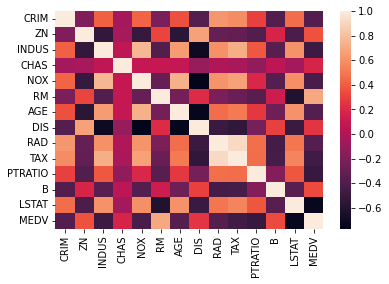

In [8]:
sns.heatmap(df.corr())

In [11]:
def get_score(X,y, random_seed=42):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )
  tree_reg_scores_max = 0
  optimal_depth = 0
  optimal_samples_split = 0
  optimal_samples_leaf = 0
  optimal_feature = ''
  for depth in range(2,7):
    for samples_split in range(2,7):
      for samples_leaf in range(1,7):
        for feature in ['auto', 'sqrt', 'log2']:
          tree_reg = DecisionTreeRegressor(max_depth=depth, min_samples_split=samples_split, min_samples_leaf=samples_leaf, max_features=feature).fit(X, y)
          tree_reg_score = tree_reg.score(X_test, y_test)
          if tree_reg_score > tree_reg_scores_max:
            tree_reg_scores_max = tree_reg_score
            optimal_depth = depth
            optimal_samples_split = samples_split
            optimal_samples_leaf = samples_leaf
            optimal_feature = feature
  return f'Optimal DecisionTreeRegressor score with depth-{optimal_depth}, min_samples_split-{optimal_samples_split}, min_samples_leaf-{optimal_samples_leaf}, max_features-{optimal_feature} = {tree_reg_scores_max}'

In [12]:
target = df['MEDV']
df_attributes = df.drop(['MEDV'], axis=1)
get_score(df_attributes, target)

'Optimal DecisionTreeRegressor score with depth-6, min_samples_split-2, min_samples_leaf-1, max_features-auto = 0.9408271061879854'